In [ ]:
# HW 3 
# CS697A - Topics CS: ML 
# dh7934_HW3.ipynb
# By: Christian Magpantay
# Code/Book Reference: 
# https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
# https://www.machinelearningplus.com/predictive-modeling/k-means-clustering/
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
# https://scikit-learn.org/stable/modules/neighbors.html#neighbors
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
# https://www.askpython.com/python/examples/principal-component-analysis
# https://gtraskas.github.io/post/ex7/
# Python Machine Learning 
# Intro to Machine Learning
#
# Please run first
import numpy as np
import pandas as pd
import math 
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt  # visualization
import seaborn as sns

tradat = pd.read_csv('optdigits.tra', sep=",")          # training data used all
tesdat = pd.read_csv('optdigits.tes', sep=",")          # test data

od_tra = np.array(tradat.values)                        # convert data frame 
od_tes = np.array(tesdat.values)                        # to np.array
od_tra_labels = od_tra[:,64]                            # keep first 64
od_tes_labels = od_tes[:,64]

od_tra = np.delete(od_tra, 64, 1)     # to remove last col, digit class
od_tes = np.delete(od_tes, 64, 1)     # ^

Q1 [2pts]: Implement the k-means clustering algorithm yourself in python. Cluster the training set k=10 and k=20 clusters. Run your clustering algorithm 10 times and report the reconstruction errors on training and test datasets for each run and for each value of k=10 and k=20 (number of clusters). 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


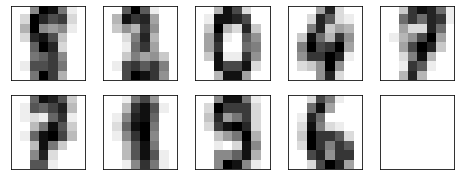

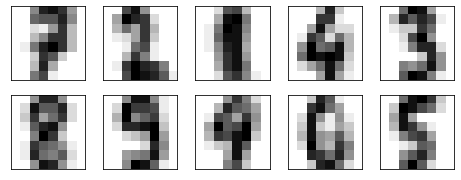

In [ ]:
# 1. init group m(i) randomly, 
# 2. calculate bti for all x^t
#   use eq: b(ti) = 1 if ||x^t-m(i)|| = min||x^t-m(i)||
#                 else 0
#   (bti = 1, x^t belongs in group m(i) )
# 3. minimize equation using
#     m(i) = 

def kMeansClustering(k, data):
    centroids = np.random.randint(0, 16,size=(10,64),dtype=int)   # init m(i)
    for i in range(10):                                           # iterate x10
        idx = findClosestCentroids(data, centroids)
        centroids = computeCentroids(data, idx, k, centroids)
    return centroids                                              # return results

def findClosestCentroids(data, centroids):
    idx = np.zeros((data.shape[0], 1), dtype=np.int8)             # init index
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - centroids, axis=1)   # find dist
        min_dst = np.argmin(distances)                            # compare
        idx[i] = min_dst                                          # set index
    return idx

def computeCentroids(data, idx, K, centroids):
    K = centroids.shape[0]                                        # iterate 64
    for k in range(K):
        centroids[k, :] = np.mean(data[idx.ravel() == k, :], axis=0)# mean(cen) of
    return centroids                                              # cluster

res = kMeansClustering(10, od_tra)                                # k = 10

fig, ax = plt.subplots(2, 5, figsize=(8, 3))                      # to print res
centers = res.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

res = kMeansClustering(20, od_tra)                                # k = 20

fig, ax = plt.subplots(2, 5, figsize=(8, 3))                      # to print res
centers = res.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


Q2 [2pts]: Implement PCA (Principal Component Analysis) algorithm yourself. Reduce the dimensionality of the training set by means of computing the parameters required by PCA on the training set. Display the training set using the first two projected dimensions of the dataset and compare with the plot in the textbook.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show>

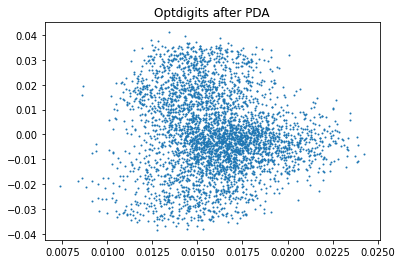

In [ ]:
# standardize the data with x - mu
# compute the covariance 
# computer the eigen values and vectors with numpy
# sort in descending order of eigenvalues for max

od_mean = od_tra_labels.mean(axis=0).reshape(-1, 1)   # mean of training
od_PCA = od_tra - od_mean                             # col training - mean
C = np.cov(od_PCA)                                    # covariance of ^
eigen_vals, eigen_vecs = np.linalg.eig(C)             # compute eigen vals/vecs
sorted_index = np.argsort(eigen_vals)[::-1]           # descend eigen vals
sorted_eigvals = eigen_vals[sorted_index]             # 
sorted_eigvecs = eigen_vecs[:,sorted_index]

proj_dim = sorted_eigvecs[:,0:2]                      # first two 
                                                      # projected dimension
# total = sum(eigen_vals)
# var_exp = [(i / total) for i in
#            sorted(eigen_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)

plt.scatter(x = proj_dim[:,0], y = proj_dim[:,1],     # plot first eigen = x
            s=1)                                      # plot sec eigen = y
plt.title('Optdigits after PDA')
plt.show


Q3 [1pts]: Using a library (do not implement LDA yourself), reduce the dimensionality of the training set by means of computing the parameters required by LDA on the training set. Display the training set using the first two projected dimensions of the dataset and compare with the plot in the textbook.

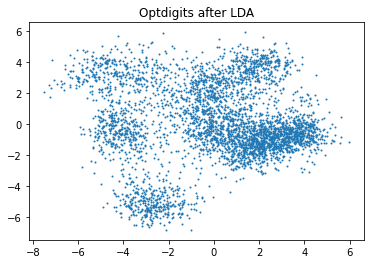

In [ ]:
# fit and train lda with data
# plot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)                                   # LDA
X_train = lda.fit(od_tra, od_tra_labels).transform(od_tra)

plt.scatter(x = X_train[:,0], y = X_train[:,1],             # plot
            s=1)
plt.title('Optdigits after LDA')
plt.show()

Q4 [2.5pts]: (use a library) Use knn (k nearest neighbor) classification algorithm
with k=3, 5, 15 to predict the class labels (0, 1, 2, …, 9) for the original test set (in 64
dimensions) using the original training set as the training dataset. Compute the
confusion matrix and also the test error for each class (0, 1, 2, ….,9) on the test
dataset. 


In [ ]:
# k = 3
# call Knn func
# fit data
# y = predict with test data
# compute confusion matrix
# compute error
# repeat for k=5,15
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

od_mean = od_tra_labels.std(axis=0).reshape(-1, 1)   # mean of training
od_std = od_tra_labels.mean(axis=0).reshape(-1, 1)   # mean of training
od_KNN = (od_tra - od_mean) / od_std                 # col training - mean

def runKNN(k):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(od_KNN, od_tra_labels)
    y_pred = knn.predict(od_tes)
    result = confusion_matrix(od_tes_labels, y_pred)
    print("Confusion Matrix:")
    print(result)
    error = (od_tes_labels - y_pred)/od_tes_labels
    print(error)

runKNN(3)
runKNN(5)
runKNN(15)
